In [4]:
# prompt: add grid search cv for knn

from sklearn.model_selection import GridSearchCV
#19
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the dataset
path = '/kaggle/input/19column/Android_Ransomeware_19col.csv'
df = pd.read_csv(path, index_col=0)

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

# Apply SMOTE to the training data (only on the training set to avoid data leakage)
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3],  # Example values for k
    'weights': ['uniform', 'distance'], # Example values for weights
    'p': [1, 2] # Example values for Minkowski distance parameter
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy') #scoring='f1'

# Fit the grid search to the training data
grid_search.fit(X_train_smote_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train a model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train_smote_scaled, y_train_smote)

# Predict on the test set using the best model
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.9095167219900399


ValueError: Found input variables with inconsistent numbers of samples: [313627, 697886]

              precision    recall  f1-score   support

           0       0.64      0.49      0.56      8587
           1       0.94      0.97      0.95     69820

    accuracy                           0.91     78407
   macro avg       0.79      0.73      0.75     78407
weighted avg       0.91      0.91      0.91     78407

Accuracy: 91.42%
Precision: 93.93%
Recall: 96.61%
F1 Score: 95.25%
Confusion Matrix:
[[ 4231  4356]
 [ 2368 67452]]


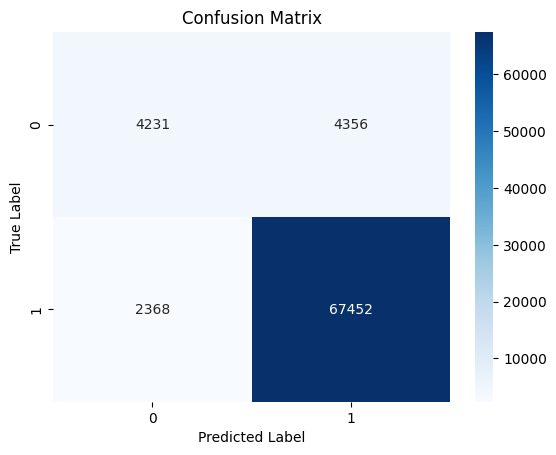

In [5]:
# Train a model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train_smote_scaled, y_train)

# Predict on the test set using the best model
y_pred = best_knn_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [8]:
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)

# Predict probabilities instead of class labels
# y_pred = best_knn_model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba = best_knn_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [78407, 4431]

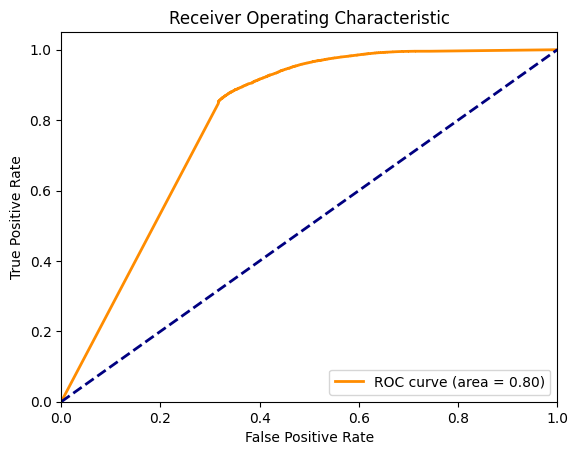

In [9]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Best parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.9003370202888007
              precision    recall  f1-score   support

           0       0.57      0.42      0.49      8587
           1       0.93      0.96      0.95     69820

    accuracy                           0.90     78407
   macro avg       0.75      0.69      0.72     78407
weighted avg       0.89      0.90      0.90     78407

Accuracy: 90.20%
Precision: 93.13%
Recall: 96.09%
F1 Score: 94.58%
ROC AUC Score: 77.16%
Confusion Matrix:
[[ 3635  4952]
 [ 2731 67089]]


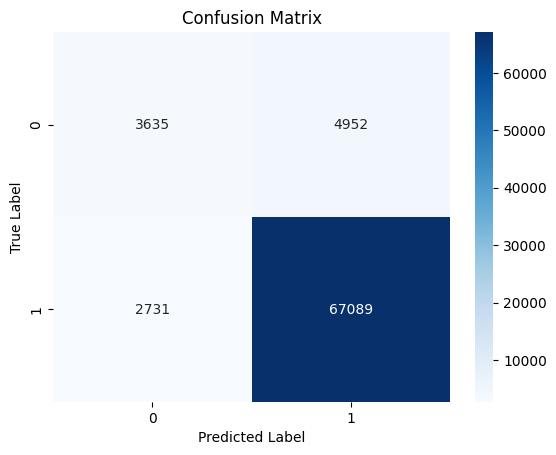

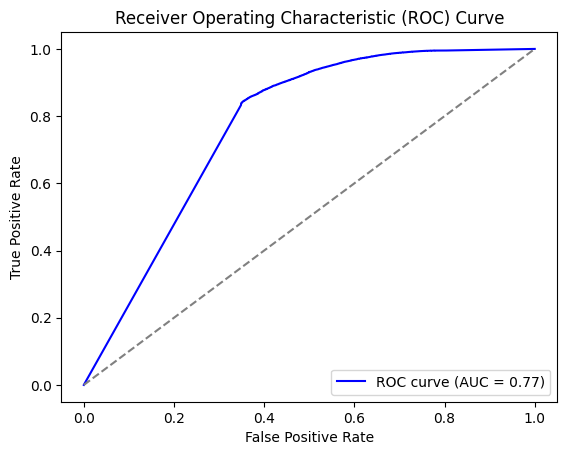

In [10]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the dataset
path = '/kaggle/input/ransomware/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Apply SMOTE to the training data to avoid data leakage
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3],  # Example values for k
    'weights': ['uniform', 'distance'], 
    'p': [1, 2] 
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_smote_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Train a model with the best parameters
best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train_smote_scaled, y_train)

# Predict on the test set using the best model
y_pred = best_knn_model.predict(X_test_scaled)
y_pred_proba = best_knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)

# Print classification report
print(classification_report(y_test, y_pred))

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'ROC AUC Score: {roc_auc * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Sử dụng PCA để giảm chiều dữ liệu 03/10/2024

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
path = '/kaggle/input/19column/Android_Ransomeware_19col.csv'
df = pd.read_csv(path, index_col=0)
print(df.info())

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Giảm chiều dữ liệu xuống 10 thành phần chính
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Initialize the models
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  # Giảm độ sâu của cây
svm = SVC(kernel='linear', probability=True, random_state=42)  # Sử dụng kernel 'linear' để tăng tốc
knn = KNeighborsClassifier(n_neighbors=3)  # Giảm số hàng xóm KNN

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft', n_jobs=-1)  # Chạy song song trên nhiều lõi CPU

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print("\nClassification Report:")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  float64
 8   Fwd Packet Length Min    392034 non-null  float64
 9   Bwd Packet Length Min    392034 non-null  float64
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Active Me

In [ ]:
!pip install -U imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the dataset
path = '/kaggle/input/19column/Android_Ransomeware_19col.csv'
df = pd.read_csv(path)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Standardize the data
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize and train the SVM model using GridSearchCV
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=13.3min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=11.3min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=10.8min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=12.6min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 9.9min
[CV] END ....................C=0.1, gamma=scale,

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

# Load the dataset
path="/kaggle/input/ransomware/Android_RansomewareDataset1.csv"
df = pd.read_csv(path, index_col=0)

# Prepare the data
X = df.drop('Label', axis=1)
y = df['Label']

# Standardize the data
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize and train the SVM model using GridSearchCV
svm_model = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='f1', verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.decomposition import PCA #1111111
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
path = '/kaggle/input/19column/Android_Ransomeware_19col.csv'
df = pd.read_csv(path, index_col=0)train_test_split
print(df.info())

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduce dimensionality with PCA (to 10 components)
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Initialize the models
dt = DecisionTreeClassifier(max_depth=10, random_state=42)  # Limited depth for faster training
svm = SVC(kernel='linear', probability=True, random_state=42)  # Linear kernel for speed
knn = KNeighborsClassifier(n_neighbors=3)  # Reduced neighbors

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft', n_jobs=-1)  # Parallel computation on all CPU cores

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 392033
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Flow ID                  392034 non-null  int64  
 1   Source IP                392034 non-null  int64  
 2   Source Port              392034 non-null  int64  
 3   Destination IP           392034 non-null  int64  
 4   Destination Port         392034 non-null  int64  
 5   Protocol                 392034 non-null  int64  
 6   Flow Duration            392034 non-null  int64  
 7   Fwd Packet Length Max    392034 non-null  float64
 8   Fwd Packet Length Min    392034 non-null  float64
 9   Bwd Packet Length Min    392034 non-null  float64
 10  Init_Win_bytes_forward   392034 non-null  int64  
 11  Init_Win_bytes_backward  392034 non-null  int64  
 12  act_data_pkt_fwd         392034 non-null  int64  
 13  min_seg_size_forward     392034 non-null  int64  
 14  Active Me

In [ ]:
# Import libraries 2/10/2024
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


# Load the dataset
path="/kaggle/input/ransomware/Android_RansomewareDataset1.csv"
df = pd.read_csv(path, index_col=0)
print(df.info())  # Kiểm tra thông tin dữ liệu
# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates enabled for voting
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')  # You can use 'hard' voting for majority voting, or 'soft' for probability-based voting

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


<class 'pandas.core.frame.DataFrame'>
Index: 392034 entries, 0 to 2931
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Flow ID                      392034 non-null  int64  
 1   Source IP                    392034 non-null  int64  
 2   Source Port                  392034 non-null  int64  
 3   Destination IP               392034 non-null  int64  
 4   Destination Port             392034 non-null  int64  
 5   Protocol                     392034 non-null  int64  
 6   Flow Duration                392034 non-null  int64  
 7   Total Fwd Packets            392034 non-null  int64  
 8   Total Backward Packets       392034 non-null  int64  
 9   Total Length of Fwd Packets  392034 non-null  int64  
 10  Total Length of Bwd Packets  392034 non-null  int64  
 11  Fwd Packet Length Max        392034 non-null  int64  
 12  Fwd Packet Length Min        392034 non-null  int64  
 13  Fwd Pa

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load your dataset (replace with your actual dataset)

# Load the dataset
path="/kaggle/input/ransomware/Android_RansomewareDataset1.csv"
df = pd.read_csv(path, index_col=0)

print(df.info())  # Kiểm tra thông tin dữ liệu


# Assuming `df` is your DataFrame and 'Label' is the target column
X = df.drop('Label', axis=1)
y = df['Label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates enabled for voting
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')  # You can use 'hard' voting for majority voting, or 'soft' for probability-based voting

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)



# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
 

# Load your dataset (replace with your actual dataset)

# Load the dataset
path = '/kaggle/input/19-all/Android_RansomewareDataset3.csv'
df = pd.read_csv(path)
print(df.info())

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

# Assuming `df` is your DataFrame and 'Label' is the target column
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates enabled for voting
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')  # You can use 'hard' voting for majority voting, or 'soft' for probability-based voting

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Evaluate the model on the test set with precision, recall, f1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load your dataset (replace with your actual dataset)
path = '/kaggle/input/ransomware/Android_RansomewareDataset1.csv'
df = pd.read_csv(path)
print(df.info())  # Kiểm tra thông tin dữ liệu

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets (using resampled data)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import NearMiss  # Import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
path = '/kaggle/input/19-all/Android_RansomewareDataset3.csv'
df = pd.read_csv(path)

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

print(df.info())

# Apply NearMiss under-sampling to the training data
near_miss = NearMiss()
X_train_nm, y_train_nm = near_miss.fit_resample(X, y)


# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train_nm = scaler.fit_transform(X_train_nm)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_nm, y_train_nm, test_size=0.2, random_state=42)





# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates enabled for voting
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')  # You can use 'hard' voting for majority voting, or 'soft' for probability-based voting

# Train the ensemble model on the under-sampled data
ensemble_model.fit(X_train_nm, y_train_nm)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print("\nClassification Report:")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import NearMiss  # Import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
path = '/kaggle/input/ransomware/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

print(df.info())

# Apply NearMiss under-sampling to the training data
near_miss = NearMiss()
X_train_nm, y_train_nm = near_miss.fit_resample(X, y)


# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train_nm = scaler.fit_transform(X_train_nm)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_nm, y_train_nm, test_size=0.2, random_state=42)





# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates enabled for voting
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')  # You can use 'hard' voting for majority voting, or 'soft' for probability-based voting

# Train the ensemble model on the under-sampled data
ensemble_model.fit(X_train_nm, y_train_nm)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print("\nClassification Report:")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.under_sampling import NearMiss  # Import NearMiss
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Load the dataset
path = '/kaggle/input/ransomware/Android_RansomewareDataset1.csv'
df = pd.read_csv(path, index_col=0)

# Prepare the data (Assuming 'Label' is the target column)
X = df.drop('Label', axis=1)
y = df['Label']

print(df.info())

# Standardize the data for SVM and KNN
scaler = StandardScaler()
X_train_scale= scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scale, y, test_size=0.2, random_state=42)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVM with probability estimates enabled for voting
knn = KNeighborsClassifier()

# Create the ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('dt', dt),
    ('svm', svm),
    ('knn', knn)
], voting='soft')  # You can use 'hard' voting for majority voting, or 'soft' for probability-based voting

# Train the ensemble model on the under-sampled data
ensemble_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print("\nClassification Report:")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

